### IMPORTING LIBRARIES

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### READING DATA

In [4]:
x_test = np.loadtxt("X_test.csv")
x_train = np.loadtxt("X_train.csv")
y_test = np.loadtxt("Y_test.csv")
y_train = np.loadtxt("Y_train.csv")

In [5]:
x_test.shape, x_train.shape, y_test.shape, y_train.shape

((50, 2), (100, 2), (50,), (100,))

### IMPLEMENTATION OF SIGMOID FUNCTION

In [6]:
def sigmoid(q):
    f = 1/(1+np.exp(-q))
    return f

### INITIALIZING RANDOM WEIGHTS

In [7]:
def initial_parms(l_size): 
    parms= {}
    for i in range(1, len(l_size)):
        parms['W' + str(i)] = np.random.randn(l_size[i], l_size[i-1])*0.01
        parms['B' + str(i)] = np.random.randn(l_size[i],1)*0.01
    return parms

### FORWARD PROPOGATION

In [8]:
def forward_prop(X_train, active_fun, parms): 
    l = len(parms)//2
    vals = {}
    for i in range(1, l+1):
        if i==1:
            vals['Z' + str(i)] = np.dot(parms['W' + str(i)], X_train) + parms['B' + str(i)]
            vals['A' + str(i)] = active_fun(vals['Z' + str(i)])
        else:
            vals['Z' + str(i)] = np.dot(parms['W' + str(i)], vals['A' + str(i-1)]) + parms['B' + str(i)]
            if i==l:
                vals['A' + str(i)] = vals['Z' + str(i)]
            else:
                vals['A' + str(i)] = active_fun(vals['Z' + str(i)])
    return vals

### BACKWARD PROPOGATION

In [9]:
def backward_prop(parms, vals, X_train, Y_train): 
    l = len(parms)//2
    m = len(Y_train)
    grds = {}
    for i in range(l,0,-1):
        if i==l:
            d_a = 1/m * (vals['A' + str(i)] - Y_train)
            d_z = d_a
        else:
            d_a = np.dot(parms['W' + str(i+1)].T, d_z)
            d_z = np.multiply(d_a, np.where(vals['A' + str(i)]>=0, 1, 0))
        if i==1:
            grds['W' + str(i)] = 1/m * np.dot(d_z, X_train.T)
            grds['B' + str(i)] = 1/m * np.sum(d_z, axis=1, keepdims=True)
        else:
            grds['W' + str(i)] = 1/m * np.dot(d_z,vals['A' + str(i-1)].T)
            grds['B' + str(i)] = 1/m * np.sum(d_z, axis=1, keepdims=True)
    return grds
def update_parms(parms, grds, learning_rate):
    l = len(parms) // 2
    parms_up = {}
    for i in range(1,l+1):
        parms_up['W' + str(i)] = parms['W' + str(i)] - learning_rate * grds['W' + str(i)]
        parms_up['B' + str(i)] = parms['B' + str(i)] - learning_rate * grds['B' + str(i)]
    return parms_up

### COST FUCTION 

In [10]:
def comp_cost(vals, Y_train): 
    l = len(vals)//2
    Y_pred = vals['A' + str(l)]
    c = 1/(2*len(Y_train)) * np.sum(np.square(Y_pred - Y_train))
    return c, Y_pred

### IMPLEMTING MODEL

In [11]:
from sklearn import metrics
def model(X_train, Y_train, l_size, n_iters, l_r): 
    parms = initial_parms(l_size)
    iter = {}
    iterpred={}
    for i in range(n_iters):
        vals = forward_prop(X_train.T, sigmoid, parms)
        cost, Ypred = comp_cost(vals, Y_train.T)
        grds = backward_prop(parms, vals,X_train.T, Y_train.T)

        parms = update_parms(parms, grds, l_r)
        iter[i] = cost
        iterpred[i]=metrics.r2_score(y_train,Ypred[0])
        print('Cost at iter ' + str(i+1) + ' = ' + str(cost) + '\n')
    return parms,iter,Ypred,iterpred

### EXCUTING MODEL

In [12]:
l_size = [2, 700, 1]  

In [13]:
n_iters = 7000   

In [14]:
l_r=0.01

In [15]:
parms,err,Ypred,iterpred = model(x_train, y_train, l_size, n_iters, l_r)    

Streaming output truncated to the last 5000 lines.
Cost at iter 4501 = 106.34709112812489

Cost at iter 4502 = 106.35247618843714

Cost at iter 4503 = 106.35786034439322

Cost at iter 4504 = 106.36324359580846

Cost at iter 4505 = 106.3686259424979

Cost at iter 4506 = 106.37400738427723

Cost at iter 4507 = 106.37938792096183

Cost at iter 4508 = 106.38476755236763

Cost at iter 4509 = 106.39014627831034

Cost at iter 4510 = 106.39552409860644

Cost at iter 4511 = 106.40090101307207

Cost at iter 4512 = 106.40627702152351

Cost at iter 4513 = 106.41165212377786

Cost at iter 4514 = 106.41702631965146

Cost at iter 4515 = 106.42239960896143

Cost at iter 4516 = 106.42777199152498

Cost at iter 4517 = 106.43314346715952

Cost at iter 4518 = 106.4385140356826

Cost at iter 4519 = 106.4438836969116

Cost at iter 4520 = 106.44925245066476

Cost at iter 4521 = 106.45462029675966

Cost at iter 4522 = 106.45998723501499

Cost at iter 4523 = 106.46535326524895

Cost at iter 4524 = 106.47071838

### The upadte function in both cases do the same task but the only difference can be seen in loss fuction. That is, in the classification problem we are using logloss since the the data is Categorical whereas in the case of regression we are using grad.

### QUESTION 2

### 1.The best function to use at output layer is linear function(f(Z)=Z). Since the values of regression data are unbounded.

### 2. The output layer should only contain one neuron.Since the problem is based on regression where you will have to get one particular value as output.Where as for classification task we will have number of classes as output.

### 3.

### CALCULATING MEAN SQUARE ERROR

In [16]:
print("average MSE loss is "+str(sum(err.values())/len(err.values())))

average MSE loss is 491.1808441387862


### CALCLULATING ACCURACY

In [17]:
from sklearn import metrics
metrics.r2_score(y_train, Ypred[0])

0.958659687640305

In [18]:
Ypred[0]

array([ -54.58117068,  108.6986116 ,  114.62522641,  -67.572691  ,
        -84.21935395,   84.9581835 ,   85.45992515,  -47.47176973,
         76.56161028,  -26.66331989,  -76.02790257,   79.31969499,
        115.2558553 ,  -16.664464  ,   58.50408404,  -74.47327471,
         50.31298778,  -64.97096447,  -87.31436436,   51.57743238,
        105.60512239,   65.22705985,    0.21455553,  116.85813758,
        -52.5046153 ,  -58.25129352,  -58.4650485 ,   85.2708287 ,
         74.56611076,   62.820674  ,  -96.68279069,  -52.35454298,
        -81.31036513,  108.22637096,  -95.34133788,  104.06426898,
         87.02721618,  113.28440513,  -97.78986697,  -81.32218434,
        114.82385836,  -26.39059685,  -35.44134885, -106.15330583,
        102.59978189,   19.9413931 ,   18.86795613, -102.97322646,
          1.04579113,   40.23368267,    6.03285434,  -90.01675508,
         84.83026642,   65.11371183,   71.45823725,  111.16537191,
         59.55939488,   72.85310397,   49.66183041,  -58.64374

### 4. 

### PLOTTING ERROR AND ACCURACY

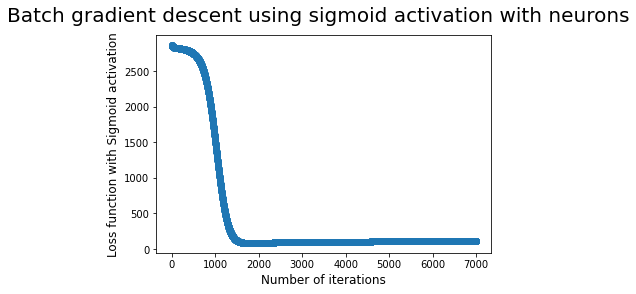

In [19]:
iter = err.keys()
val = err.values()
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle("Batch gradient descent using sigmoid activation with neurons", fontsize = 20)
ax.scatter(iter,val)
ax.set_xlabel('Number of iterations', fontsize = 12)
ax.set_ylabel("Loss function with Sigmoid activation", fontsize = 12)
plt.show()

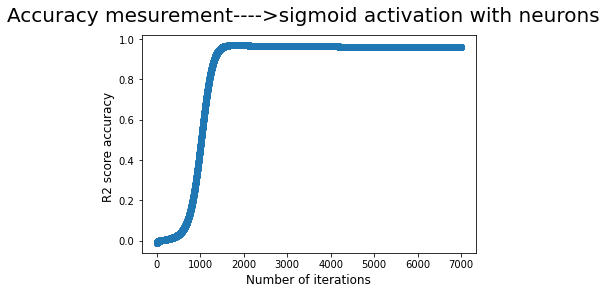

In [20]:
iter = iterpred.keys()
val = iterpred.values()
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle("Accuracy mesurement---->sigmoid activation with neurons", fontsize = 20)
ax.scatter(iter,val)
ax.set_xlabel('Number of iterations', fontsize = 12)
ax.set_ylabel("R2 score accuracy ", fontsize = 12)
plt.show()

### 5.

### IMPLEMENTING MODEL FOR DIIFERENT LEARNING RATES

In [21]:
from sklearn import metrics
def model2(X_train, Y_train, l_size, n_iters, l_r): 
    parms = initial_parms(l_size)
    iter = {}
    iterpred={}
    for i in range(n_iters):
        vals = forward_prop(X_train.T, sigmoid, parms)
        cost, Ypred = comp_cost(vals, Y_train.T)
        grds = backward_prop(parms, vals,X_train.T, Y_train.T)
        parms = update_parms(parms, grds, l_r)
        iter[i] = cost
        iterpred[i]=metrics.r2_score(y_train,Ypred[0])
    return parms,iter,Ypred,iterpred

In [ ]:
d={}
j=0
d1={}
for i in np.arange(0.001,1,0.01):
    parms,err,Ypred,iterpred = model2(x_train, y_train, l_size, n_iters,i)
    d[j]=metrics.r2_score(y_train,Ypred[0])
    d1[j]=sum(err.values())/len(err.values())
    j=j+1

In [ ]:
iter = np.arange(0.001,1,0.01)
val = d.values()
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle("Accuracy mesurement---->sigmoid activation with different learning rate", fontsize = 20)
ax.scatter(iter,val)
ax.set_xlabel('learning rate', fontsize = 12)
ax.set_ylabel("R2 score accuracy ", fontsize = 12)
plt.show()

In [ ]:
iter = np.arange(0.001,1,0.01)
val = err.values()
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle("Batch gradient descent using sigmoid with diffferent learning rates", fontsize = 20)
ax.scatter(iter,val)
ax.set_xlabel('Learning rates', fontsize = 12)
ax.set_ylabel("Loss function with Sigmoid activation", fontsize = 12)
plt.show()

### 6.

### a.

In [ ]:
d={}
d1={}
j=0
for i in np.arange(1,11):
    l_size = [2,i,1] 
    parms,err,Ypred,iterpred = model2(x_train, y_train, l_size, n_iters,0.01)
    d[j]=metrics.r2_score(y_train,Ypred[0])
    d1[j]=sum(err.values())/len(err.values())
    j=j+1

In [ ]:
iter = range(1,11)
val = d.values()
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle("Accuracy mesurement---->sigmoid activation with various number of neurons", fontsize = 20)
ax.scatter(iter,val)
ax.set_xlabel('Number of neurons in hidden layer', fontsize = 12)
ax.set_ylabel("R2 score accuracy ", fontsize = 12)
plt.show()

In [ ]:
iter = range(1,11)
val = d1.values()
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle("LOSS OR ERROR---->sigmoid activation with various number of neurons", fontsize = 20)
ax.scatter(iter,val)
ax.set_xlabel('Number of neurons in hidden layer', fontsize = 12)
ax.set_ylabel("ERROR OR LOSS ", fontsize = 12)
plt.show()

### There is no need to change the update rule, Even there are more number of layers, the weights will be updated for each neuron irrespective of number of layers or neurons.

### b.

In [ ]:
l_size = [2,10,1] 
parms,err,Ypred,iterpred = model2(x_train, y_train, l_size, n_iters,0.01)

In [ ]:
print("average MSE loss is "+str(sum(err.values())/len(err.values())))

In [ ]:
plt.scatter(y_train,range(0,100))
plt.scatter(Ypred,range(100))
plt.tilte("ACTUAL VLAUES VS PREDICTED VALUES with 10 hidden layer neurons")
plt.legend("ACTUAL","PREDICTED")

In [ ]:
l_size = [2,100,1] 
parms,err,Ypred,iterpred = model2(x_train, y_train, l_size, n_iters,0.01)

In [ ]:
print("average MSE loss is "+str(sum(err.values())/len(err.values())))

In [ ]:
plt.scatter(y_train,range(0,100))
plt.scatter(Ypred,range(100))
plt.tilte("ACTUAL VLAUES VS PREDICTED VALUES with 100 hidden layer neurons")
plt.legend("ACTUAL","PREDICTED")

In [ ]:
l_size = [2,500,1] 
parms,err,Ypred,iterpred = model2(x_train, y_train, l_size, n_iters,0.01)

In [ ]:
print("average MSE loss is "+str(sum(err.values())/len(err.values())))

In [ ]:
plt.scatter(y_train,range(0,100))
plt.scatter(Ypred,range(100))
plt.tilte("ACTUAL VLAUES VS PREDICTED VALUES with 500 hidden layer neurons")
plt.legend("ACTUAL","PREDICTED")

In [ ]:
l_size = [2,700,1] 
parms,err,Ypred,iterpred = model2(x_train, y_train, l_size, n_iters,0.01)

In [ ]:
print("average MSE loss is "+str(sum(err.values())/len(err.values())))

In [ ]:
plt.scatter(y_train,range(0,100))
plt.scatter(Ypred,range(100))
plt.tilte("ACTUAL VLAUES VS PREDICTED VALUES with 700 hidden layer neurons")
plt.legend("ACTUAL","PREDICTED")

### we can see that as the number of neurons in the hidden layer increases the accuracy of the prediction is way better. Though it requires more computational power.But adding more neurons to hidden layer is increasing the accuracy in far more better way. But adding too many layers also have bad impactof over fitting so we need to find a trade-off value that can produce good accuracy as well as doesnt over it the data

### 7.

### a.THERE IS NO NEED TO CHANGE THE UPDATE RULE

### b. the only change that we need to make is in the function call where we have to change the activation fuction from sigmoid to relu. and we have to create a relu function

### C.

### USING RELU ACTIVATION

In [ ]:
def relu(Z):
    A = np.maximum(0, Z)
    return A

In [ ]:
from sklearn import metrics
def model3(X_train, Y_train, l_size, n_iters, l_r): 
    parms = initial_parms(l_size)
    iter = {}
    iterpred={}
    for i in range(n_iters):
        vals = forward_prop(X_train.T, relu, parms)
        cost, Ypred = comp_cost(vals, Y_train.T)
        grds = backward_prop(parms, vals,X_train.T, Y_train.T)
        parms = update_parms(parms, grds, l_r)
        iter[i] = cost
        iterpred[i]=metrics.r2_score(y_train,Ypred[0])
        print('Cost at iter ' + str(i+1) + ' = ' + str(cost) + '\n')
    return parms,iter,Ypred,iterpred

In [ ]:
parms,err,Ypred,iterpred = model3(x_train, y_train, [2,10,1], 5000, 0.01)    


In [ ]:
iter = err.keys()
val = err.values()
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle("Batch gradient descent using relu activation with neurons", fontsize = 20)
ax.scatter(iter,val)
ax.set_xlabel('Number of iterations', fontsize = 12)
ax.set_ylabel("Loss function with relu activation", fontsize = 12)
plt.show()

In [ ]:
iter = iterpred.keys()
val = iterpred.values()
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle("Batch gradient descent using relu activation with neurons", fontsize = 20)
ax.scatter(iter,val)
ax.set_xlabel('Number of iterations', fontsize = 12)
ax.set_ylabel("R2 score accuracy ", fontsize = 12)
plt.show()

In [ ]:
print("average MSE loss is "+str(sum(err.values())/len(err.values())))

In [ ]:
plt.scatter(y_train,range(0,100))
plt.scatter(Ypred,range(100))
plt.tilte("ACTUAL VLAUES VS PREDICTED VALUES with 10 hidden layer neurons")
plt.legend("ACTUAL","PREDICTED")

### USING TANH ACTIVATION

In [ ]:
def tanh(Z):
    A = np.tanh(Z)
    return A

In [ ]:
from sklearn import metrics
def model4(X_train, Y_train, l_size, n_iters, l_r): 
    parms = initial_parms(l_size)
    iter = {}
    iterpred={}
    for i in range(n_iters):
        vals = forward_prop(X_train.T, tanh, parms)
        cost, Ypred = comp_cost(vals, Y_train.T)
        grds = backward_prop(parms, vals,X_train.T, Y_train.T)
        parms = update_parms(parms, grds, l_r)
        iter[i] = cost
        iterpred[i]=metrics.r2_score(y_train,Ypred[0])
        print('Cost at iter ' + str(i+1) + ' = ' + str(cost) + '\n')
    return parms,iter,Ypred,iterpred

In [ ]:
parms,err,Ypred,iterpred = model4(x_train, y_train, [2,10,1], 5000, 0.01)    

In [ ]:
iter = err.keys()
val = err.values()
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle("Batch gradient descent using tanh activation with neurons", fontsize = 20)
ax.scatter(iter,val)
ax.set_xlabel('Number of iterations', fontsize = 12)
ax.set_ylabel("Loss function with tanh activation", fontsize = 12)
plt.show()

In [ ]:
iter = iterpred.keys()
val = iterpred.values()
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle("Batch gradient descent using tanh activation with neurons", fontsize = 20)
ax.scatter(iter,val)
ax.set_xlabel('Number of iterations', fontsize = 12)
ax.set_ylabel("R2 score accuracy ", fontsize = 12)
plt.show()

In [ ]:
print("average MSE loss is "+str(sum(err.values())/len(err.values())))

In [ ]:
plt.scatter(y_train,range(0,100))
plt.scatter(Ypred,range(100))
plt.tilte("ACTUAL VLAUES VS PREDICTED VALUES with 10 hidden layer neurons")
plt.legend("ACTUAL","PREDICTED")

### we can see that compared to sigmoid activation fuction the both tanh and relu works way more better producing very less loss
### Even though the tanh producing less accuracy it is not too better update to the sigmoid 
### the relu is the best activation function so far, which is producing the least error even with less number of neurons in hidden layer. The error produced by relu by using 10 neurons is being produced with 500 neurons by sigmoid. 
### clearly relu is way good for this data